In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Read a image


1.   Upload and read an image, convert to Gray Scale if needed
2.   Choose a threshold value and plot the result after applying **Binary thresholding**
3.   Blur your image with Gaussian Kernel
4.   Sharpen your image with mask
5.   Apply edge detection to your image

**HINT** : remember to include your image file



In [2]:
# read image
img = cv2.imread('/content/gdrive/My Drive/AI_medical/Day1/010.jpg')
img = img[:,:,::-1] # BGR -> RGB
img.shape

(224, 224, 3)

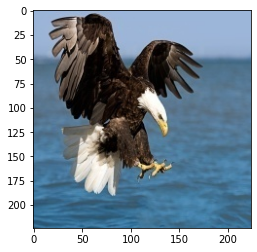

In [3]:
plt.imshow(img)

In [4]:
# RGB -> Gray scale
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_gray.shape

(224, 224)

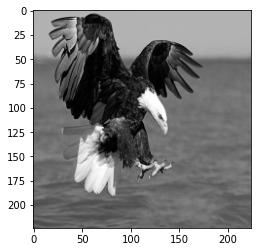

In [5]:
plt.imshow(img_gray, cmap='gray')

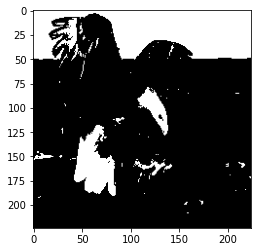

In [6]:
# Binary Thresholding
ret, img_th = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(img_th, cmap='gray')

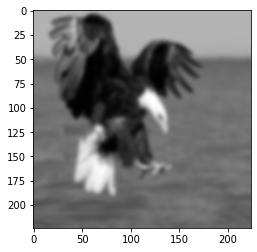

In [7]:
# Blur
img_blurred = cv2.GaussianBlur(img_gray, (11, 11), 0)
plt.imshow(img_blurred, cmap='gray')

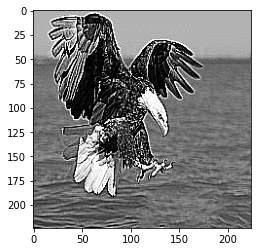

In [8]:
# Sharpening
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
img_sharpened = cv2.filter2D(img_gray, -1, kernel)
plt.imshow(img_sharpened, cmap='gray')

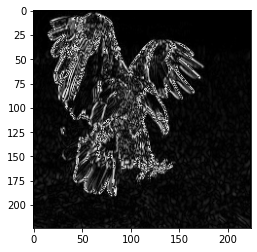

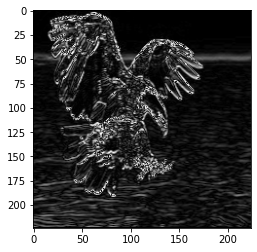

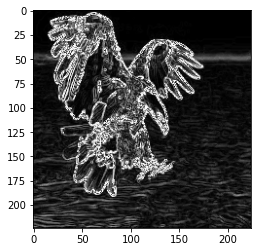

In [9]:
# Edge Detection - Sobel
sobelX = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1)

# absolute value
sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobel_com = cv2.bitwise_or(sobelX, sobelY)

plt.imshow(sobelX, cmap='gray')
plt.show()
plt.imshow(sobelY, cmap='gray')
plt.show()
plt.imshow(sobel_com, cmap='gray')
plt.show()

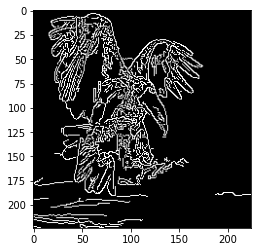

In [10]:
# Edge Detection - Canny
img_canny = cv2.Canny(img_gray, 30, 130)
plt.imshow(img_canny, cmap='gray')